In [ ]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# taking in input

file = open("kalmann.txt", 'r')
pos = np.loadtxt('kalmann.txt', delimiter=',', usecols=[0,1])
vel = np.loadtxt('kalmann.txt', delimiter=',', skiprows=1, usecols=[2,3])
vel = np.insert(vel, [0], 0, axis=0)

In [ ]:
# initializing errors and acceleration

del_t = 1
a_x = 0.03
a_y = 0.02
sig_x = 0.1
sig_y = 0.1
sig_vx = 4
sig_vy = 4
U = np.zeros((2,1))
U[0,0], U[1,0] = (a_x, a_y)

# initializing the transformation matrices
A = np.zeros((4,4))
A[0,0], A[1,1], A[2,2], A[3,3], A[0,2], A[1,3] = [1,1,1,1,del_t,del_t]
print(A)
B = np.zeros((4,2))
B[0,0], B[1,1], B[2,0], B[3,1] = [0.5* del_t**2, 0.5* del_t**2, del_t, del_t]
print(B)


[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[0.5 0. ]
 [0.  0.5]
 [1.  0. ]
 [0.  1. ]]


In [ ]:
# declaring the state and process covarience matrices to use later on
pred_st = []
est_st = []
pred_p = []
est_p = []

In [ ]:
# initializing the predicted state and the process covarience matrix.
init_st = np.zeros((4,1))
init_st[:,0] = (pos[0,0], pos[0,1], vel[0,0], vel[0,1])
print(init_st)

pred_st.append(init_st)
print(pred_st[0].shape)

init_p = np.zeros((4,4))
init_p[0,0], init_p[1,1], init_p[2,2], init_p[3,3] = (10,10,10,10)
pred_p.append(init_p)

[[3.72998151e+02]
 [3.68680447e-06]
 [0.00000000e+00]
 [0.00000000e+00]]
(4, 1)


In [ ]:
# computing process noise covarience matrix

Q = np.zeros((4,4))
Q[0,:] = (sig_x**2, sig_x*sig_y, sig_x*sig_vx, sig_x*sig_vy)
Q[1,:] = (sig_x*sig_y, sig_y**2, sig_y*sig_vx, sig_vy*sig_y)
Q[2,:] = (sig_x*sig_vx, sig_vx*sig_y, sig_vx**2, sig_vx*sig_vy)
Q[3,:] = (sig_x*sig_vy, sig_vy*sig_y, sig_vy*sig_vx, sig_vy**2)


# H matrix
H = np.eye((4))


# R matrix (measurement noise covarience matrix)
R = np.zeros((4,4))
R[0,0], R[1,1], R[2,2], R[3,3] = (100,100,1,1)

# printing the values

print(Q)
print(H)
print(R)

[[1.0e-02 1.0e-02 4.0e-01 4.0e-01]
 [1.0e-02 1.0e-02 4.0e-01 4.0e-01]
 [4.0e-01 4.0e-01 1.6e+01 1.6e+01]
 [4.0e-01 4.0e-01 1.6e+01 1.6e+01]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[100.   0.   0.   0.]
 [  0. 100.   0.   0.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


In [ ]:
# function to calc the new predicted state
def predict_st(Xk_1):
  Xkp = np.dot(A,Xk_1) + np.dot(B,U)
  return Xkp

In [ ]:
# function to calculate the new predicted covariance matrix

def predict_p(Pk_1):
  AT = np.transpose(A)
  Pkp = np.add(np.dot(np.dot(A,Pk_1), AT), Q)
  return Pkp

In [ ]:
# function to extract the next measured value

def measurement(i):
  Y = np.zeros((4,1))
  Y[:,0] = (pos[i,0], pos[i,1], vel[i,0], vel[i,1])
  return Y

In [ ]:
# function to calculate Kalman Gain

def Kal(Pkp):
  Kn = np.dot(np.dot(H, Pkp), np.linalg.inv(np.add(R, np.dot(H, np.dot(Pkp, np.transpose(H))))))
  return Kn

In [ ]:
# function to update the value of state matrix

def update_st(Kn, Y, Xkp):
  Xk = np.add(Xkp, np.dot(Kn, np.subtract(Y, Xkp)))
  return Xk

In [ ]:
# function to update the value of process covarience matrix

def update_p(Kn, Pkp):
  Pk = np.dot(np.eye(4) - np.dot(Kn, H), Pkp)
  return Pk


In [ ]:
# driver part of the code to get the estimates

for i in range(1,len(vel)):
    print("\n------------------\n\nIteration number :",i)
    Y=measurement(i)
    pred_p.append(predict_p(pred_p[i-1]))
    pred_st.append(predict_st(pred_st[i-1]))
    ki=Kal(pred_p[i])
    # print(ki)
    # print(pred_st[i].shape)
    # print(predict_st(pred_st[i-1]).shape)
    # print(update_st(ki, Y, pred_st[i]).shape)
    est_st.append(update_st(ki, Y, pred_st[i]))
    est_p.append(update_p(ki, pred_p[i]))
    print("Estimated position(x,y) :- (%g,%g)" % (est_st[i][0,0],est_st[i][1,0]))
    print("Uncertainity(x,y) :- (%g,%g)" % (est_p[i][0,0],est_p[i][1,1]))


------------------

Iteration number : 1
Estimated position(x,y) :- (370.595,4.0182)
Uncertainity(x,y) :- (12.295,12.295)

------------------

Iteration number : 2
Estimated position(x,y) :- (370.794,4.87787)
Uncertainity(x,y) :- (12.295,12.295)

------------------

Iteration number : 3
Estimated position(x,y) :- (371.742,11.588)
Uncertainity(x,y) :- (21.5965,21.5965)

------------------

Iteration number : 4
Estimated position(x,y) :- (369.638,11.8814)
Uncertainity(x,y) :- (21.5965,21.5965)

------------------

Iteration number : 5
Estimated position(x,y) :- (371.121,20.328)
Uncertainity(x,y) :- (33.9709,33.9709)

------------------

Iteration number : 6
Estimated position(x,y) :- (372.018,23.4013)
Uncertainity(x,y) :- (33.9709,33.9709)

------------------

Iteration number : 7
Estimated position(x,y) :- (373.06,30.3468)
Uncertainity(x,y) :- (44.6888,44.6888)

------------------

Iteration number : 8
Estimated position(x,y) :- (371.678,33.1254)
Uncertainity(x,y) :- (44.6888,44.6888)


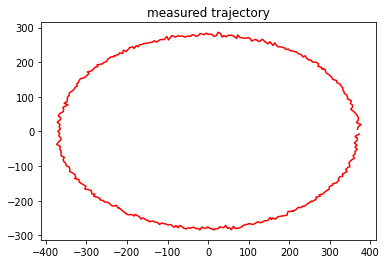

In [ ]:
# graph generation for the given measured values
a=[]
b=[]

for i in range(1,len(vel)):
    a.append(pos[i][0])
    b.append(pos[i][1])

plt.plot(a,b,color='red')
plt.title("measured trajectory")
plt.show()

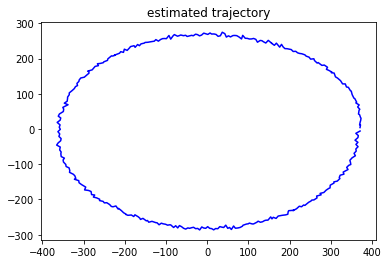

In [ ]:
# Graph generation for the estimated values
a=[]
b=[]
for i in range(1,len(vel)):
    a.append(est_st[i][0,0])
    b.append(est_st[i][1,0])
plt.plot(a,b,color='blue')
plt.title("estimated trajectory")
plt.show()

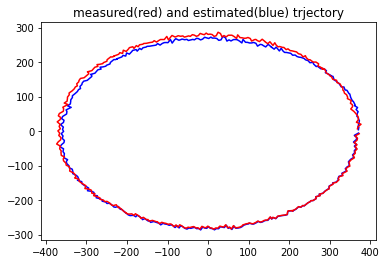

In [ ]:
# Estimated graph and measured value graph comparison
a1=[]
b1=[]
a2=[]
b2=[]

for i in range(1,len(vel)):
    a1.append(est_st[i][0,0])
    b1.append(est_st[i][1,0])    
    a2.append(pos[i][0])
    b2.append(pos[i][1])    

plt.plot(a1,b1,color='blue')
plt.plot(a2,b2,color='red')
plt.title("measured(red) and estimated(blue) trjectory")
plt.show()